In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
import datetime
from datetime import datetime as dt

In [2]:
num_weeks = 27

#initialise the date for the first week of the dataset (week ending on start_date)
filedate = pd.Timestamp('2019-03-02 00:00:00')


#initialise the regex for the MTA turnstile url
filename_regex = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"

filelist = []

for numfiles in range (num_weeks):

    # create the appropriate filename for the week by linking the right format of the dates to turnstile_{}.txt
    filedate_str = str(filedate.year)[2:4] + str(filedate.month).zfill(2) + str(filedate.day).zfill(2)
    filename = filename_regex.format(filedate_str)

    # read the file and append it to the list of files to be concacated
    MTA_data_covid_before = pd.read_csv(filename, parse_dates=['DATE'], keep_date_col=True)
    filelist.append(MTA_data_covid_before)

    # advance to the next week
    filedate += pd.Timedelta(days=7)

MTA_data_covid_before= pd.concat(filelist, axis=0, ignore_index=True)

In [3]:
#read data
MTA_data_covid_before

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,03:00:00,REGULAR,6955483,2359112
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,07:00:00,REGULAR,6955494,2359125
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,11:00:00,REGULAR,6955554,2359199
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,15:00:00,REGULAR,6955714,2359248
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,19:00:00,REGULAR,6956004,2359292
...,...,...,...,...,...,...,...,...,...,...,...
5546768,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-08-30,05:00:00,REGULAR,5554,389
5546769,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-08-30,09:00:00,REGULAR,5554,389
5546770,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-08-30,13:00:00,REGULAR,5554,389
5546771,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-08-30,17:00:00,REGULAR,5554,389


In [4]:
#Checking general info about dataframe
MTA_data_covid_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5546773 entries, 0 to 5546772
Data columns (total 11 columns):
 #   Column                                                                Dtype         
---  ------                                                                -----         
 0   C/A                                                                   object        
 1   UNIT                                                                  object        
 2   SCP                                                                   object        
 3   STATION                                                               object        
 4   LINENAME                                                              object        
 5   DIVISION                                                              object        
 6   DATE                                                                  datetime64[ns]
 7   TIME                                                                  ob

In [5]:
MTA_data_covid_before.isnull().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [6]:
#Checking DataFrame's first 5 rows
MTA_data_covid_before.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,03:00:00,REGULAR,6955483,2359112
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,07:00:00,REGULAR,6955494,2359125
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,11:00:00,REGULAR,6955554,2359199
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,15:00:00,REGULAR,6955714,2359248
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,19:00:00,REGULAR,6956004,2359292


In [7]:
#Checking DataFrame's last 5 rows
MTA_data_covid_before.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
5546768,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-08-30,05:00:00,REGULAR,5554,389
5546769,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-08-30,09:00:00,REGULAR,5554,389
5546770,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-08-30,13:00:00,REGULAR,5554,389
5546771,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-08-30,17:00:00,REGULAR,5554,389
5546772,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-08-30,21:00:00,REGULAR,5554,389


In [8]:
#Checking DataFrame size
MTA_data_covid_before.shape

(5546773, 11)

In [9]:
#Checking basic descriptive statistics for numerical columns.
MTA_data_covid_before.describe()

,ENTRIES,EXITS
count,5.546773e+06,5.546773e+06
mean,4.162472e+07,3.415511e+07
std,2.126808e+08,1.962081e+08
min,0.000000e+00,0.000000e+00
25%,3.290880e+05,1.324140e+05
50%,2.164711e+06,1.245443e+06
75%,6.747819e+06,4.608125e+06
max,2.129459e+09,2.124283e+09


In [10]:
# Adding "TURNSTILE" columns that concatenate 'C/A', 'UNIT', 'SCP'

MTA_data_covid_before["TURNSTILE"] = MTA_data_covid_before["C/A"]+"-"+MTA_data_covid_before["UNIT"]+"-"+MTA_data_covid_before["SCP"]
MTA_data_covid_before.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,03:00:00,REGULAR,6955483,2359112,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,07:00:00,REGULAR,6955494,2359125,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,11:00:00,REGULAR,6955554,2359199,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,15:00:00,REGULAR,6955714,2359248,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,19:00:00,REGULAR,6956004,2359292,A002-R051-02-00-00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,23:00:00,REGULAR,6956147,2359325,A002-R051-02-00-00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-24,03:00:00,REGULAR,6956177,2359332,A002-R051-02-00-00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-24,07:00:00,REGULAR,6956184,2359339,A002-R051-02-00-00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-24,11:00:00,REGULAR,6956215,2359388,A002-R051-02-00-00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-24,15:00:00,REGULAR,6956315,2359432,A002-R051-02-00-00


In [11]:
MTA_data_covid_before["DATE"]=MTA_data_covid_before["DATE"].astype("datetime64[ns]")

In [12]:
# Check the column headings
MTA_data_covid_before.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'TURNSTILE'],
      dtype='object')

In [13]:
#Checking duplicates rows and drop.

MTA_data_covid_before.drop_duplicates(subset=None, keep="first", inplace=True)
MTA_data_covid_before


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,03:00:00,REGULAR,6955483,2359112,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,07:00:00,REGULAR,6955494,2359125,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,11:00:00,REGULAR,6955554,2359199,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,15:00:00,REGULAR,6955714,2359248,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,19:00:00,REGULAR,6956004,2359292,A002-R051-02-00-00
...,...,...,...,...,...,...,...,...,...,...,...,...
5546768,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-08-30,05:00:00,REGULAR,5554,389,TRAM2-R469-00-05-01
5546769,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-08-30,09:00:00,REGULAR,5554,389,TRAM2-R469-00-05-01
5546770,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-08-30,13:00:00,REGULAR,5554,389,TRAM2-R469-00-05-01
5546771,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-08-30,17:00:00,REGULAR,5554,389,TRAM2-R469-00-05-01


In [14]:
#Remove the extra spaces in the column headings
MTA_data_covid_before.columns = [column.strip() for column in MTA_data_covid_before.columns]

In [15]:

# Check column headings again.
MTA_data_covid_before.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'TURNSTILE'],
      dtype='object')

In [16]:
MTA_data_covid_before.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5546773 entries, 0 to 5546772
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       datetime64[ns]
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  TURNSTILE  object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 550.1+ MB


In [17]:
MTA_data_covid_before['HOUR'] = MTA_data_covid_before['TIME'].apply(lambda x:int(x[:2]))
MTA_data_covid_before

MTA_data_covid_before['DATE'] = pd.to_datetime(MTA_data_covid_before['DATE'])

MTA_data_covid_before['Datetime'] = MTA_data_covid_before['DATE'] + pd.to_timedelta(MTA_data_covid_before['HOUR'], unit='H')

In [18]:
MTA_data_covid_before

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,HOUR,Datetime
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,03:00:00,REGULAR,6955483,2359112,A002-R051-02-00-00,3,2019-02-23 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,07:00:00,REGULAR,6955494,2359125,A002-R051-02-00-00,7,2019-02-23 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,11:00:00,REGULAR,6955554,2359199,A002-R051-02-00-00,11,2019-02-23 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,15:00:00,REGULAR,6955714,2359248,A002-R051-02-00-00,15,2019-02-23 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,19:00:00,REGULAR,6956004,2359292,A002-R051-02-00-00,19,2019-02-23 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5546768,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-08-30,05:00:00,REGULAR,5554,389,TRAM2-R469-00-05-01,5,2019-08-30 05:00:00
5546769,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-08-30,09:00:00,REGULAR,5554,389,TRAM2-R469-00-05-01,9,2019-08-30 09:00:00
5546770,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-08-30,13:00:00,REGULAR,5554,389,TRAM2-R469-00-05-01,13,2019-08-30 13:00:00
5546771,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-08-30,17:00:00,REGULAR,5554,389,TRAM2-R469-00-05-01,17,2019-08-30 17:00:00


In [19]:
MTA_data_covid_before["NAMEOFDAY"]= MTA_data_covid_before["Datetime"].dt.day_name()

#Checking sample 5 rows
MTA_data_covid_before

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,HOUR,Datetime,NAMEOFDAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,03:00:00,REGULAR,6955483,2359112,A002-R051-02-00-00,3,2019-02-23 03:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,07:00:00,REGULAR,6955494,2359125,A002-R051-02-00-00,7,2019-02-23 07:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,11:00:00,REGULAR,6955554,2359199,A002-R051-02-00-00,11,2019-02-23 11:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,15:00:00,REGULAR,6955714,2359248,A002-R051-02-00-00,15,2019-02-23 15:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-02-23,19:00:00,REGULAR,6956004,2359292,A002-R051-02-00-00,19,2019-02-23 19:00:00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5546768,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-08-30,05:00:00,REGULAR,5554,389,TRAM2-R469-00-05-01,5,2019-08-30 05:00:00,Friday
5546769,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-08-30,09:00:00,REGULAR,5554,389,TRAM2-R469-00-05-01,9,2019-08-30 09:00:00,Friday
5546770,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-08-30,13:00:00,REGULAR,5554,389,TRAM2-R469-00-05-01,13,2019-08-30 13:00:00,Friday
5546771,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-08-30,17:00:00,REGULAR,5554,389,TRAM2-R469-00-05-01,17,2019-08-30 17:00:00,Friday


In [20]:
MTA_data_covid_before = MTA_data_covid_before[["STATION","TURNSTILE","DATE","TIME","Datetime","NAMEOFDAY","ENTRIES","EXITS"]]
MTA_data_covid_before

,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS
0,59 ST,A002-R051-02-00-00,2019-02-23,03:00:00,2019-02-23 03:00:00,Saturday,6955483,2359112
1,59 ST,A002-R051-02-00-00,2019-02-23,07:00:00,2019-02-23 07:00:00,Saturday,6955494,2359125
2,59 ST,A002-R051-02-00-00,2019-02-23,11:00:00,2019-02-23 11:00:00,Saturday,6955554,2359199
3,59 ST,A002-R051-02-00-00,2019-02-23,15:00:00,2019-02-23 15:00:00,Saturday,6955714,2359248
4,59 ST,A002-R051-02-00-00,2019-02-23,19:00:00,2019-02-23 19:00:00,Saturday,6956004,2359292
...,...,...,...,...,...,...,...,...
5546768,RIT-ROOSEVELT,TRAM2-R469-00-05-01,2019-08-30,05:00:00,2019-08-30 05:00:00,Friday,5554,389
5546769,RIT-ROOSEVELT,TRAM2-R469-00-05-01,2019-08-30,09:00:00,2019-08-30 09:00:00,Friday,5554,389
5546770,RIT-ROOSEVELT,TRAM2-R469-00-05-01,2019-08-30,13:00:00,2019-08-30 13:00:00,Friday,5554,389
5546771,RIT-ROOSEVELT,TRAM2-R469-00-05-01,2019-08-30,17:00:00,2019-08-30 17:00:00,Friday,5554,389


In [21]:
print("Maximum date: ")
print(MTA_data_covid_before["Datetime"].max())
print()
print("Minimum date: ")
print(MTA_data_covid_before["Datetime"].min())

Maximum date: 
2019-08-30 23:00:00

Minimum date: 
2019-02-23 00:00:00


In [22]:
len(MTA_data_covid_before["STATION"].unique())

379

In [23]:
len(MTA_data_covid_before["TURNSTILE"].unique())

4995

In [24]:
print("Row count based on stations (First 10 rows)")
print(MTA_data_covid_before["STATION"].value_counts().sort_values(ascending=False).head(10))

Row count based on stations (First 10 rows)
34 ST-PENN STA     116688
FULTON ST          111223
23 ST               82566
GRD CNTRL-42 ST     77503
86 ST               70701
CANAL ST            66406
34 ST-HERALD SQ     62975
CHAMBERS ST         62050
59 ST               59702
TIMES SQ-42 ST      58766
Name: STATION, dtype: int64


In [25]:
MTA_data_covid_before.min()

STATION                     1 AV
TURNSTILE     A002-R051-02-00-00
DATE         2019-02-23 00:00:00
TIME                    00:00:00
Datetime     2019-02-23 00:00:00
NAMEOFDAY                 Friday
ENTRIES                        0
EXITS                          0
dtype: object

In [26]:
MTA_data_covid_before.groupby('STATION').min()

,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS
STATION,,,,,,,
1 AV,H007-R248-00-00-00,2019-02-23,00:00:00,2019-02-23 03:00:00,Friday,11325,1213
103 ST,N037-R314-00-00-00,2019-02-23,00:00:00,2019-02-23 00:00:00,Friday,437,423
103 ST-CORONA,R529-R208-00-00-00,2019-02-23,00:00:00,2019-02-23 03:00:00,Friday,1047859,371110
104 ST,J034-R007-00-00-00,2019-02-23,00:00:00,2019-02-23 03:00:00,Friday,178404,114888
110 ST,R253-R181-00-00-00,2019-02-23,00:00:00,2019-02-23 03:00:00,Friday,3357662,1331322
...,...,...,...,...,...,...,...
WOODLAWN,R294-R052-00-00-00,2019-02-23,00:00:00,2019-02-23 03:00:00,Friday,134254,28448
WORLD TRADE CTR,N094-R029-01-00-00,2019-02-23,00:00:00,2019-02-23 03:00:00,Friday,0,8
WTC-CORTLANDT,R106-R305-01-00-00,2019-02-23,00:00:00,2019-02-23 00:00:00,Friday,2,0


In [27]:
gb = MTA_data_covid_before.groupby('STATION')
gb_aggs = gb.agg({'ENTRIES': 'min', 'EXITS': 'min',})
gb_aggs

,ENTRIES,EXITS
STATION,,
1 AV,11325,1213
103 ST,437,423
103 ST-CORONA,1047859,371110
104 ST,178404,114888
110 ST,3357662,1331322
...,...,...
WOODLAWN,134254,28448
WORLD TRADE CTR,0,8
WTC-CORTLANDT,2,0


In [28]:
MTA_data_covid_before.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5546773 entries, 0 to 5546772
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   STATION    object        
 1   TURNSTILE  object        
 2   DATE       datetime64[ns]
 3   TIME       object        
 4   Datetime   datetime64[ns]
 5   NAMEOFDAY  object        
 6   ENTRIES    int64         
 7   EXITS      int64         
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 380.9+ MB


In [29]:
data1 = MTA_data_covid_before[(MTA_data_covid_before["TURNSTILE"]=="N037-R314-00-00-00") &(MTA_data_covid_before['DATE']> '2019-02-23') & (MTA_data_covid_before['DATE'] <= '2019-04-23')]
data1

,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS
46849,103 ST,N037-R314-00-00-00,2019-02-24,00:00:00,2019-02-24 00:00:00,Sunday,13954758,11236050
46850,103 ST,N037-R314-00-00-00,2019-02-24,04:00:00,2019-02-24 04:00:00,Sunday,13954778,11236081
46851,103 ST,N037-R314-00-00-00,2019-02-24,08:00:00,2019-02-24 08:00:00,Sunday,13954816,11236112
46852,103 ST,N037-R314-00-00-00,2019-02-24,12:00:00,2019-02-24 12:00:00,Sunday,13955106,11236209
46853,103 ST,N037-R314-00-00-00,2019-02-24,16:00:00,2019-02-24 16:00:00,Sunday,13955402,11236284
...,...,...,...,...,...,...,...,...
1673163,103 ST,N037-R314-00-00-00,2019-04-23,05:00:00,2019-04-23 05:00:00,Tuesday,14069232,11296768
1673164,103 ST,N037-R314-00-00-00,2019-04-23,09:00:00,2019-04-23 09:00:00,Tuesday,14069856,11296893
1673165,103 ST,N037-R314-00-00-00,2019-04-23,13:00:00,2019-04-23 13:00:00,Tuesday,14070422,11297117
1673166,103 ST,N037-R314-00-00-00,2019-04-23,17:00:00,2019-04-23 17:00:00,Tuesday,14070913,11297420


In [30]:
data1["TURNSTILE"].max()

'N037-R314-00-00-00'

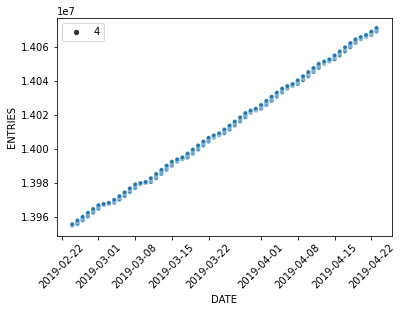

In [31]:
ax = sns.scatterplot(x="DATE", y="ENTRIES", data=data1 ,size=4)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

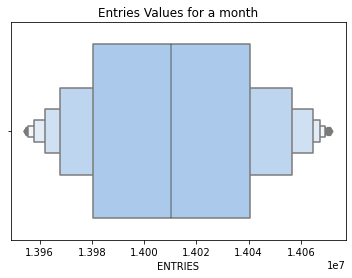

In [32]:
ax = sns.boxenplot(x='ENTRIES', data=data1,palette="pastel").set(xlabel='ENTRIES',title="Entries Values for a month")

In [33]:
mta_entries = MTA_data_covid_before.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).ENTRIES.max() - MTA_data_covid_before.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).ENTRIES.min()

mta_exits = MTA_data_covid_before.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).EXITS.max() - MTA_data_covid_before.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).EXITS.min()



In [34]:
mta_entries = MTA_data_covid_before.ENTRIES.reset_index()

mta_exits =MTA_data_covid_before.EXITS.reset_index()


In [35]:
mta_entries_exits = pd.merge(mta_entries, mta_exits, how="outer")

mta_entries_exits["TRAFFIC"] = mta_entries_exits["ENTRIES"] + mta_entries_exits["EXITS"]

mta_entries_exits["STATION"]=MTA_data_covid_before["STATION"]

mta_entries_exits["NAMEOFDAY"]=MTA_data_covid_before["NAMEOFDAY"]

mta_entries_exits

,index,ENTRIES,EXITS,TRAFFIC,STATION,NAMEOFDAY
0,0,6955483,2359112,9314595,59 ST,Saturday
1,1,6955494,2359125,9314619,59 ST,Saturday
2,2,6955554,2359199,9314753,59 ST,Saturday
3,3,6955714,2359248,9314962,59 ST,Saturday
4,4,6956004,2359292,9315296,59 ST,Saturday
...,...,...,...,...,...,...
5546768,5546768,5554,389,5943,RIT-ROOSEVELT,Friday
5546769,5546769,5554,389,5943,RIT-ROOSEVELT,Friday
5546770,5546770,5554,389,5943,RIT-ROOSEVELT,Friday
5546771,5546771,5554,389,5943,RIT-ROOSEVELT,Friday


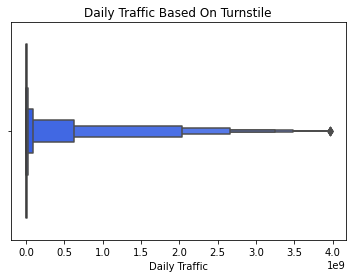

In [36]:
ax = sns.boxenplot(x='TRAFFIC', data=mta_entries_exits,palette="bright").set(xlabel='Daily Traffic',title="Daily Traffic Based On Turnstile")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


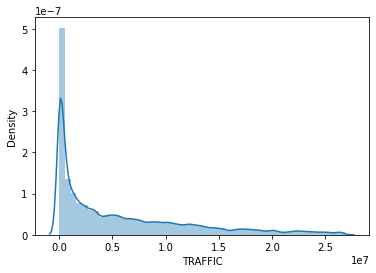

In [37]:
mta_traffic_under_percentileX = mta_entries_exits[mta_entries_exits["TRAFFIC"]<(mta_entries_exits.TRAFFIC.quantile(0.90))]
ax=sns.distplot(mta_traffic_under_percentileX["TRAFFIC"])

MemoryError: 

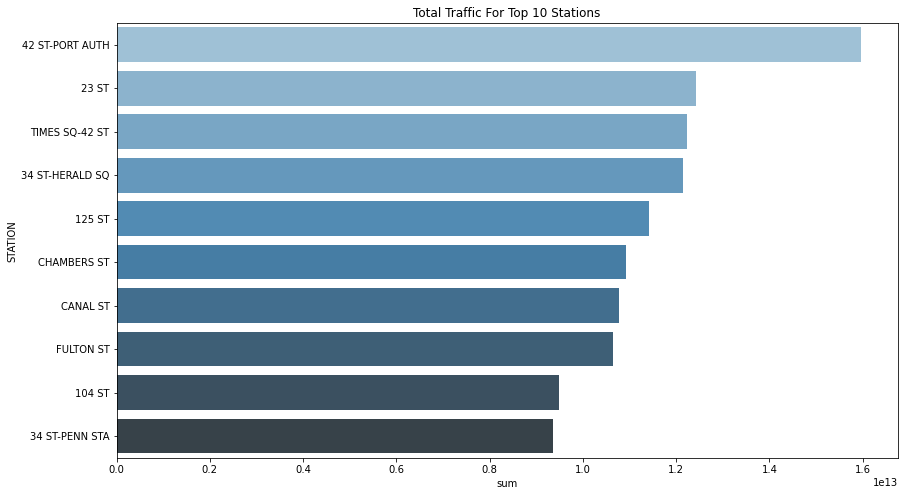

In [38]:
plt.figure(figsize=(14, 8))
plt.title("Total Traffic For Top 10 Stations")
graph1DF = mta_entries_exits.groupby(['STATION']).TRAFFIC.agg(['sum']).reset_index()
graph1DF = graph1DF.nlargest(10,'sum')
sns.barplot(x="sum", y="STATION", orient = "h", data=graph1DF, palette = "Blues_d")
plt.savefig('10TopStations.png', dpi = 1000)

In [39]:
mta_top10 = mta_entries_exits.groupby("STATION").sum().sort_values("TRAFFIC",ascending=False).head(10)
mta_top10

MemoryError: Unable to allocate 169. MiB for an array with shape (5546773, 4) and data type float64

In [ ]:
mta_busiest_day = mta_entries_exits.groupby("NAMEOFDAY").sum().sort_values("TRAFFIC",ascending=False)
mta_busiest_day = mta_busiest_day.reset_index()
mta_busiest_day

In [ ]:
mta_top10

In [ ]:
mta_top10 = mta_entries_exits.groupby(["STATION","NAMEOFDAY"]).sum()

mta_top10 = mta_top10.reset_index()

mta_top10 = mta_top10[(mta_top10["STATION"]=="42 ST-PORT AUTH") 
                  | (mta_top10["STATION"]=="23 ST")
                  | (mta_top10["STATION"]=='161/YANKEE STAD')
                  | (mta_top10["STATION"]=='34 ST-HERALD SQ')
                  | (mta_top10["STATION"]=="34 ST-PENN STA")
                  | (mta_top10["STATION"]=="125 ST")
                  | (mta_top10["STATION"]=="FULTON ST")
                  | (mta_top10["STATION"]=="CANAL ST")
                  | (mta_top10["STATION"]=="DEKALB AV")
                  | (mta_top10["STATION"]=="TIMES SQ-42 ST")]


mta_top10 = mta_top10.reset_index()

mta_top10